In [60]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import os

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Read data
#path = os.getcwd()
#print(path)
datafolder=""
dd = pd.read_csv("total-confirmed-deaths-of-covid-19-per-million-people-vs-gdp-per-capita.csv")

In [28]:
print(dd.dtypes)

Entity     object
Code       object
Date       object
deaths    float64
Year      float64
GDP       float64
dtype: object


In [29]:
print("\n-dd-\n",
dd.index,"\n",
dd.columns)


-dd-
 RangeIndex(start=0, stop=57953, step=1) 
 Index(['Entity', 'Code', 'Date', 'deaths', 'Year', 'GDP'], dtype='object')


In [30]:
dd.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [46]:
ddlast=dd[dd['Date'].isin(["Apr 10, 2020"])]
ddlast

,Entity,Code,Date,deaths,Year,GDP
101,Afghanistan,AFG,"Apr 10, 2020",0.385,2017.0,1803.987487
325,Albania,ALB,"Apr 10, 2020",7.992,2017.0,11803.430594
549,Algeria,DZA,"Apr 10, 2020",5.359,2017.0,13913.839363
699,Andorra,AND,"Apr 10, 2020",323.562,NaN,NaN
923,Angola,AGO,"Apr 10, 2020",0.061,2017.0,5819.494971
1060,Anguilla,AIA,"Apr 10, 2020",0.000,NaN,NaN
1284,Antigua and Barbuda,ATG,"Apr 10, 2020",20.423,2017.0,21490.942659
1508,Arab World,NaN,"Apr 10, 2020",NaN,2017.0,15413.791998
1732,Argentina,ARG,"Apr 10, 2020",1.748,2017.0,18933.907147
1956,Armenia,ARM,"Apr 10, 2020",3.712,2017.0,8787.579940


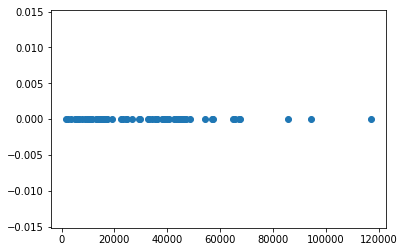

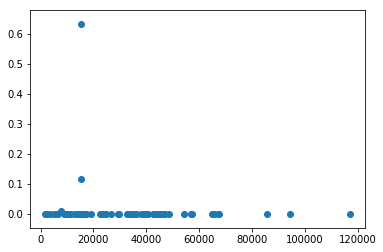

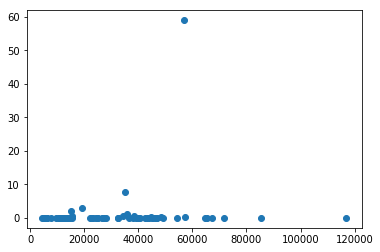

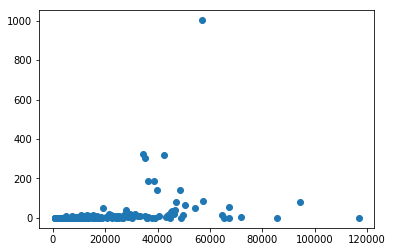

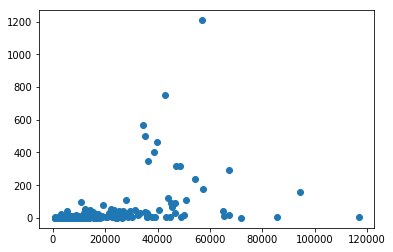

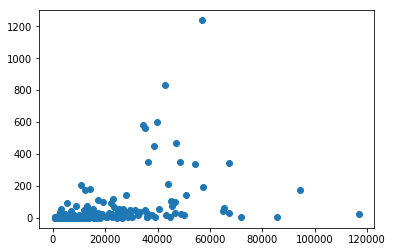

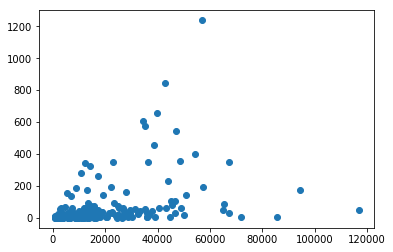

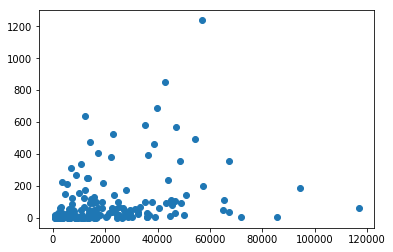

In [66]:
allmonths = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug"]
onemonth =["Aug"]
for mm in allmonths:
  ddlast=dd[dd['Date'].isin([mm + " 10, 2020"])].dropna()
  plt.scatter(ddlast.GDP, ddlast.deaths)
  plt.show()


Coefficients: 
 [[0.00278825]]
Mean squared error: 25231.52
Coefficient of determination: 0.11


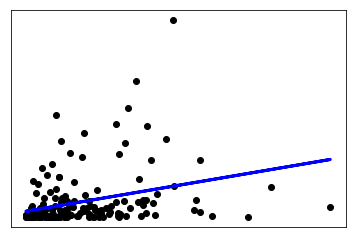

In [65]:
  x=np.c_[ddlast['GDP']]
  y=np.c_[ddlast['deaths']]

  model=sklearn.linear_model.LinearRegression()

  model.fit(x,y)

  y_predict=model.predict(x)


  # The coefficients
  print('Coefficients: \n', model.coef_)
  # The mean squared error
  print('Mean squared error: %.2f'
      % mean_squared_error(y, y_predict))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'
      % r2_score(y, y_predict))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [25]:
def plot_mydata(mydataframe, colx,coly):
  # Process dataset
  #mydataframe[colx] = pd.to_datetime(mydataframe[colx])
  #mydataframe[coly] = pd.to_numeric(mydataframe[coly])

  # Plot
  #fig=plt.figure()
  #plt.plot(mydataframe[colx], mydataframe[coly])
  #mydataframe.plot(x=colx,y=coly)
  #ax = plt.gca()
  #ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
  #plt.gcf().autofmt_xdate() # Rotation

  #ax1 = mydataframe.plot(x=colx,y=coly,c='DarkBlue')
  #plt.show()

In [35]:
dd.Entity

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
5        Afghanistan
6        Afghanistan
7        Afghanistan
8        Afghanistan
9        Afghanistan
10       Afghanistan
11       Afghanistan
12       Afghanistan
13       Afghanistan
14       Afghanistan
15       Afghanistan
16       Afghanistan
17       Afghanistan
18       Afghanistan
19       Afghanistan
20       Afghanistan
21       Afghanistan
22       Afghanistan
23       Afghanistan
24       Afghanistan
25       Afghanistan
26       Afghanistan
27       Afghanistan
28       Afghanistan
29       Afghanistan
            ...     
57923       Zimbabwe
57924       Zimbabwe
57925       Zimbabwe
57926       Zimbabwe
57927       Zimbabwe
57928       Zimbabwe
57929       Zimbabwe
57930       Zimbabwe
57931       Zimbabwe
57932       Zimbabwe
57933       Zimbabwe
57934       Zimbabwe
57935       Zimbabwe
57936       Zimbabwe
57937       Zimbabwe
57938       Zimbabwe
57939       Z

<Figure size 432x288 with 0 Axes>

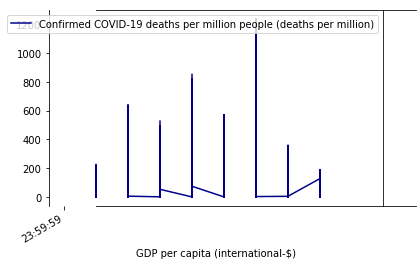

In [26]:
plot_mydata(dd,'GDP per capita (international-$)','Confirmed COVID-19 deaths per million people (deaths per million)')